In [3]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization,Reshape,Permute,Activation  
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.preprocessing.image import img_to_array  
from tensorflow.keras.callbacks import ModelCheckpoint  
print(tf.__version__)
from model import SegNet
model = SegNet()
model.summary()

2.2.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization_26 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_27 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
batch_normalization_28 (Batc (None, 128, 128, 12

In [4]:
from  preprocessing import*
img_set, val_set = get_train_val(0.25)

FileNotFoundError: [Errno 2] No such file or directory: '/media/gentry/数据分区/深度学习数据/train_dataset/train'

In [3]:
from RSjunyi import rs 

# img = rs.img_read('/fastdata/deeplearning/原始数据/train1.png')
label = rs.img_read('/fastdata/deeplearning/原始数据/train1_labels_8bits.png')


# rs.img_plot('/fastdata/deeplearning/原始数据/train1.png')
# rs.img_plot('/fastdata/deeplearning/原始数据/train1_labels_8bits.png')
# rs.img_clip(img, label, clip_num= 10000, img_h = 256, img_w = 256, agument= False)

label_reshape = label.reshape((5142 * 5664,))
print(label_reshape.shape)

label_flatten = label.flatten()
print(label_flatten.shape)
print(label_flatten)
print(label_reshape)
label_reshape == label_flatten


**************************************************
{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 5664, 'height': 5142, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
h * w * b: (5142, 5664, 1)
data type: uint8
**************************************************
(29124288,)
(29124288,)
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


array([ True,  True,  True, ...,  True,  True,  True])

In [4]:
classes=[0,1,2,3,4,5]
labelencoder = LabelEncoder()
labelencoder.fit(classes)

train_label = rs.img_read('/fastdata/deeplearning/原始数据/train1_labels_8bits.png')
train_label = label.reshape((5142 * 5664,)) 
print(train_label.shape)
train_label = np.array(train_label).flatten()
train_label = labelencoder.transform(train_label)
train_label = to_categorical(train_label, num_classes= 6)
train_label = train_label.reshape((1, 5142, 5664, 6))
print(train_label.shape)



**************************************************
{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 5664, 'height': 5142, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
h * w * b: (5142, 5664, 1)
data type: uint8
**************************************************
(29124288,)
(1, 5142, 5664, 6)


In [5]:
from RSjunyi import rs 
img = rs.img_read('/media/gentry/数据分区/深度学习数据/test/train/1.png')
img = np.expand_dims(img, axis = 0)
# label = model.predict_classes(img, verbose = 2)


**************************************************
{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 256, 'height': 256, 'count': 3, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
h * w * b: (256, 256, 3)
data type: uint8
**************************************************
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
1/1 - 0s


In [6]:
label[0].shape

(256, 256)

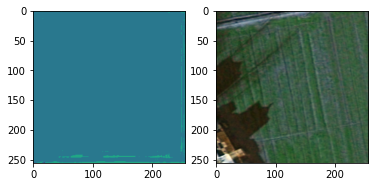

In [7]:
import matplotlib.pyplot as plt  
label = label.reshape((256, 256)).astype(np.uint8)
plt.subplot(1,2,1)
plt.imshow(label)
plt.subplot(1,2,2)
plt.imshow(img.reshape(256, 256, 3))
plt.show()


In [7]:
model = SegNet()
modelcheck = ModelCheckpoint(model_path, monitor='val_acc',save_best_only=True,mode='max')
callable = [modelcheck,tf.keras.callbacks.TensorBoard(log_dir='.')]
model_checkpoint = ModelCheckpoint(model_path, monitor= 'loss', save_best_only= True)
train_set, val_set = get_train_val()
train_n = len(train_set)
val_n = len(val_set)
model.fit_generator(generateData(BS,train_set),steps_per_epoch=(train_n//BS), epochs=EPOCHS,
    callbacks = callable,
    validation_data = generateData(BS, val_set),
    validation_steps = (val_n//BS))


************************************
spliting training dataset finished
train_num: 7500
val_num: 2500
************************************
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_4/conv2d_108/Conv2D (defined at <ipython-input-7-85b94b3efd9e>:11) ]] [Op:__inference_train_function_19675]

Function call stack:
train_function


In [1]:
from RSjunyi import rs
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
img = rs.img_read('/media/gentry/工作/高分辨率图像数据/BDCI2017-jiage-Semi/training-训练数据/train3.png')



n_label=5
classes=[0.0,1.0,2.0,3.0,4.0]

labelencoder = LabelEncoder()  
labelencoder.fit(classes)

image_size = 256
stride = 128

h, w, _ = img.shape

padding_h = (h//stride + 1) * stride 
padding_w = (w//stride + 1) * stride

padding_img = np.zeros((padding_h,padding_w,3),dtype=np.uint8)
padding_img[0:h,0:w,:] = img[:,:,:]
plt.imshow(padding_img)

mask_whole = np.zeros((padding_h, padding_w), dtype = np.uint8)

for i in range(padding_h // stride):
    for j in range(padding_w // stride):
        crop = padding_img[i * stride : i * stride + image_size, j * stride : j * stride + image_size, :3]
        c_h, c_w, _ = crop.shape
        if c_h != image_size or c_w != image_size:
            print('error size')
            continue
        crop = np.expand_dims(crop, axis = 0)
        predict = model.predict_classes(crop)

        # 
        # predict = labelencoder.inverse_transform(predict[0])
        predict = predict.reshape((256, 256)).astype(np.uint8)

        # shape: 256  * 256
        mask_whole[i * stride : i * stride + image_size, j * stride : j * stride + image_size] = predict[:,:]
        img = mask_whole[0:h, 0:w]
        

cv2.imwrite('/home/gentry/图片/predicted.png', img)

plt.imshow(img)

**************************************************
{'driver': 'PNG', 'dtype': 'uint16', 'nodata': 256.0, 'width': 3357, 'height': 6116, 'count': 3, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
h * w * b: (6116, 3357, 3)
data type: uint8
**************************************************


NameError: name 'LabelEncoder' is not defined